# Churn

In [ ]:
raise SystemExit("Stop right there!");

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# System
import os

# Mathematical operations and data manipulation
import pandas as pd

# Modelling
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Suppress
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
churn_data = pd.read_csv(
    f"{data_path}/Churn_Modelling.csv", index_col="RowNumber"
)
# Print first 5 rows
churn_data.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

<a id="wrangling"></a>
## Data wrangling

In [4]:
# Print information about the dataframe including the index
# dtype and columns, non-null values and memory usage
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Summarize the central tendency, dispersion and shape of a d
# ataset’s distribution, excluding NaN values. This is a numeric:
# count = number of non-NA/null observations.
# mean = mean of the values.
# std = standard deviation of the observations.
# min = minimum of the values in the object.
# lower (25), 50 and upper (75) percentiles. The 50 percentile is the
#                                                same as the median.
# max = maximum of the values in the object.

churn_data.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [6]:
# Remove for the purpose unproductive columns
churn_data.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [7]:
# Two columns are left which have text data: Geography and Gender.
# Many machine learning algorithms cannot operate on text data directly.
# They require all input variables and output variables to be numeric.
# This means that categorical data must be converted to numerical:
# 1. Assign each unique category value an integer value, called
# Ordinal Encoding (or Label Encoding or Integer Encoding).
# 2. For categorical variables where no ordinal relationship exists,
# such as for Geography, use One-Hot Encoding.
# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Geography_dummies = pd.get_dummies(
    prefix="Geo", data=churn_data, columns=["Geography"]
)
Geography_dummies.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                               
1                  619  Female   42       2       0.00              1   
2                  608  Female   41       1   83807.86              1   
3                  502  Female   42       8  159660.80              3   
4                  699  Female   39       1       0.00              2   
5                  850  Female   43       2  125510.82              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geo_France  \
RowNumber                                                                   
1                  1               1        101348.88       1           1   
2                  0               1        112542.58       0           0   
3                  1               0        113931.57       1           1   
4                  0               0         93826.63       0           1   
5                  1               1         79084.10       0           0   

           Geo_Germany  Geo_Spain  
RowNumber                          
1                    0          0  
2                    0          1  
3                    0          0  
4                    0          0  
5                    0          1

In [8]:
# For Gender, ordinal encoding can be used
Gender_dummies = Geography_dummies.replace(
    to_replace={"Gender": {"Female": 1, "Male": 0}}
)
Gender_dummies.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                               
1                  619       1   42       2       0.00              1   
2                  608       1   41       1   83807.86              1   
3                  502       1   42       8  159660.80              3   
4                  699       1   39       1       0.00              2   
5                  850       1   43       2  125510.82              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geo_France  \
RowNumber                                                                   
1                  1               1        101348.88       1           1   
2                  0               1        112542.58       0           0   
3                  1               0        113931.57       1           1   
4                  0               0         93826.63       0           1   
5                  1               1         79084.10       0           0   

           Geo_Germany  Geo_Spain  
RowNumber                          
1                    0          0  
2                    0          1  
3                    0          0  
4                    0          0  
5                    0          1

In [9]:
# Put the results in a new churn_data dataframe, and check results
churn_data_encoded = Gender_dummies
churn_data_encoded

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                               
1                  619       1   42       2       0.00              1   
2                  608       1   41       1   83807.86              1   
3                  502       1   42       8  159660.80              3   
4                  699       1   39       1       0.00              2   
5                  850       1   43       2  125510.82              1   
...                ...     ...  ...     ...        ...            ...   
9996               771       0   39       5       0.00              2   
9997               516       0   35      10   57369.61              1   
9998               709       1   36       7       0.00              1   
9999               772       0   42       3   75075.31              2   
10000              792       1   28       4  130142.79              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geo_France  \
RowNumber                                                                   
1                  1               1        101348.88       1           1   
2                  0               1        112542.58       0           0   
3                  1               0        113931.57       1           1   
4                  0               0         93826.63       0           1   
5                  1               1         79084.10       0           0   
...              ...             ...              ...     ...         ...   
9996               1               0         96270.64       0           1   
9997               1               1        101699.77       0           1   
9998               0               1         42085.58       1           1   
9999               1               0         92888.52       1           0   
10000              1               0         38190.78       0           1   

           Geo_Germany  Geo_Spain  
RowNumber                          
1                    0          0  
2                    0          1  
3                    0          0  
4                    0          0  
5                    0          1  
...                ...        ...  
9996                 0          0  
9997                 0          0  
9998                 0          0  
9999                 1          0  
10000                0          0  

[10000 rows x 13 columns]

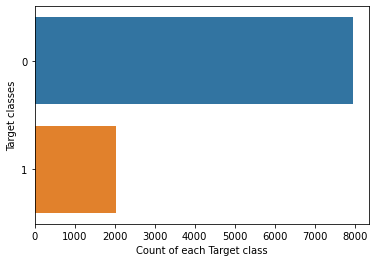

In [10]:
# Show the counts of observations in each categorical bin
# (column Exited) using bars.
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(y=churn_data_encoded.Exited, data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

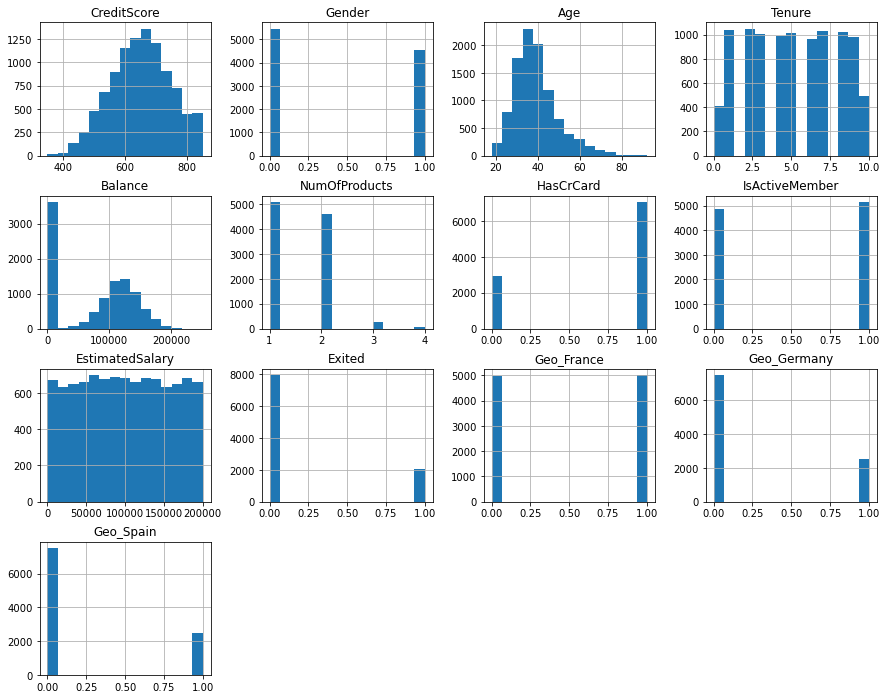

In [11]:
# Show distributions of the dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
churn_data_encoded.hist(figsize=(15, 12), bins=15)
plt.title("Features Distribution")
plt.show()

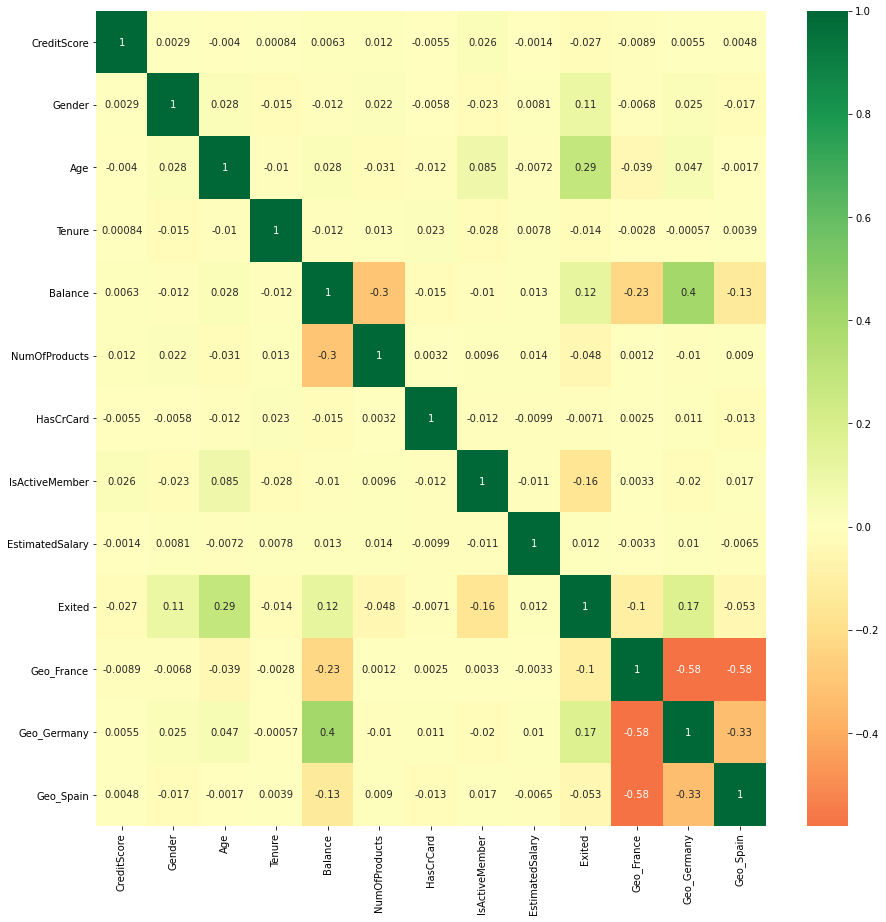

In [12]:
# Plot rectangular data as a color-encoded matrix.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
# https://matplotlib.org/stable/api/figure_api.html
plt.figure(figsize=(15, 15))
p = sns.heatmap(churn_data_encoded.corr(), annot=True, cmap="RdYlGn", center=0)

<a id="model"></a>
## Training of the network

In [13]:
# Exited is target class
X = churn_data_encoded.drop(["Exited"], axis=1)
y = churn_data_encoded.Exited

In [14]:
# Check
X.head(10)

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
RowNumber                                                               
1                  619       1   42       2       0.00              1   
2                  608       1   41       1   83807.86              1   
3                  502       1   42       8  159660.80              3   
4                  699       1   39       1       0.00              2   
5                  850       1   43       2  125510.82              1   
6                  645       0   44       8  113755.78              2   
7                  822       0   50       7       0.00              2   
8                  376       1   29       4  115046.74              4   
9                  501       0   44       4  142051.07              2   
10                 684       0   27       2  134603.88              1   

           HasCrCard  IsActiveMember  EstimatedSalary  Geo_France  \
RowNumber                                                           
1                  1               1        101348.88           1   
2                  0               1        112542.58           0   
3                  1               0        113931.57           1   
4                  0               0         93826.63           1   
5                  1               1         79084.10           0   
6                  1               0        149756.71           0   
7                  1               1         10062.80           1   
8                  1               0        119346.88           0   
9                  0               1         74940.50           1   
10                 1               1         71725.73           1   

           Geo_Germany  Geo_Spain  
RowNumber                          
1                    0          0  
2                    0          1  
3                    0          0  
4                    0          0  
5                    0          1  
6                    0          1  
7                    0          0  
8                    1          0  
9                    0          0  
10                   0          0

In [15]:
# Split dataset into the Training set and Test set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)

# The dataset contains attributes with a mixtures of scales for
# various quantities.
# Many machine learning methods expect or are more effective if
# the data attributes have the same scale.
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Sequential model to initialise our ANN and dense module to build the layers.
# https://keras.io/guides/sequential_model/
# https://keras.io/api/layers/core_layers/dense/

In [17]:
# Create a Sequential model with 3 layers incrementally
# https://keras.io/guides/

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(
    Dense(
        units=6, kernel_initializer="uniform", activation="relu", input_dim=12
    )
)
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
# Adding the output layer
classifier.add(
    Dense(units=1, kernel_initializer="uniform", activation="sigmoid")
)

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)

<a id="evaluations"></a>
## Evaluations

In [ ]:
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print("Train score:", score)
print("Train accuracy:", acc)

# Making predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print("*" * 20)
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print("Test score:", score)
print("Test accuracy:", acc)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Evaluation metrics
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt="g")
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
y_pred = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="ANN")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test, y_pred)